In [1]:
%matplotlib notebook
from bayes_opt import BayesianOptimization
import numpy as np
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import gridspec
from matplotlib import cm


# plt.style.use(['dark_background'])

In [2]:
def target(x1,x2):
    return  - 1 * ((4 - (2.1 * (x1**2)) + (x1**4)/3) * (x1**2) + x1*x2 + (-4 + 4*(x2**2)) * x2**2)

In [3]:
X1Vals = np.linspace(-3,3,100)
X2Vals = np.linspace(-2,2,100)
X1, X2 = np.meshgrid(X1Vals, X2Vals)
Y = target(X1,X2)

<IPython.core.display.Javascript object>


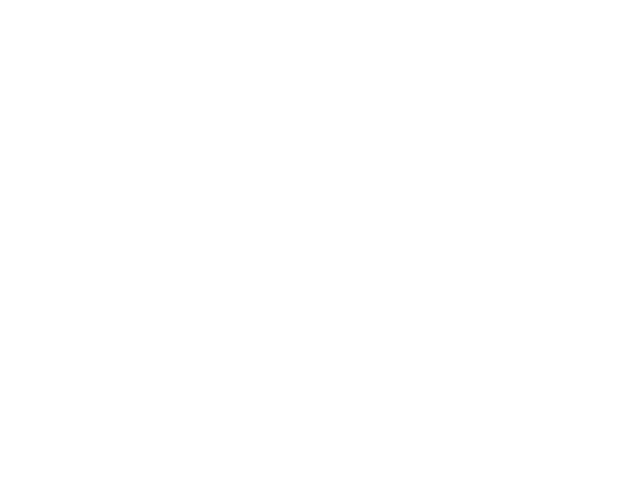

<IPython.core.display.Javascript object>


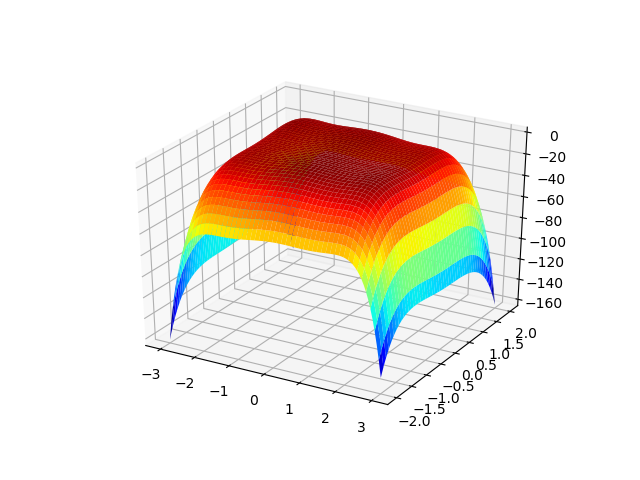

In [4]:
plt.clf()
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X1, X2, Y, label='6C', cmap="jet")
plt.show()

In [15]:
bo = BayesianOptimization(target, {'x1':(-3,3), 'x2': (-2,2)})

In [16]:
bo.maximize(init_points=2, n_iter=10, acq='ei', xi=1e-4)

Initialization
-----------------------------------------------------
 Step |   Time |      Value |        x1 |        x2 | 
    1 | 00m00s | -117.16155 |   -2.8913 |   -1.8181 | 
    2 | 00m00s |  -69.10108 |   -2.8451 |    1.0575 | 
Bayesian Optimization
-----------------------------------------------------
 Step |   Time |      Value |        x1 |        x2 | 
    3 | 00m00s | -162.90000 |    3.0000 |    2.0000 | 
    4 | 00m00s | -150.90000 |   -3.0000 |    2.0000 | 
    5 | 00m02s |  -46.65185 |    1.7127 |   -2.0000 | 
    6 | 00m02s |    0.43781 |   -0.0534 |    0.3502 | 
    7 | 00m00s |    0.82977 |   -0.0319 |    0.5348 | 
    8 | 00m00s |    1.00623 |   -0.0284 |    0.6715 | 
    9 | 00m00s |    1.02178 |   -0.1114 |    0.7446 | 
   10 | 00m00s |    0.97084 |   -0.0459 |    0.7869 | 
   11 | 00m00s |    1.02993 |   -0.0884 |    0.6981 | 
   12 | 00m00s |    1.03116 |   -0.0811 |    0.7167 | 


In [ ]:
def posterior(bo, x, xmin=-2, xmax=10):
    xmin, xmax = -2, 10
    bo.gp.fit(bo.X, bo.Y)
    mu, sigma = bo.gp.predict(x, return_std=True)
    return mu, sigma

In [7]:
target(0.0898, -0.7126)

1.0316284229280819